In [1]:
from pathlib import Path
from hjelpefunksjonar import f2t

%matplotlib widget
import pickle
import h5py

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# from check_collision import check_all_collisions
# from f import f
from rib import Rib

plt.rcParams["font.family"] = "STIXGeneral"
plt.rcParams['mathtext.fontset'] = 'stix'


    

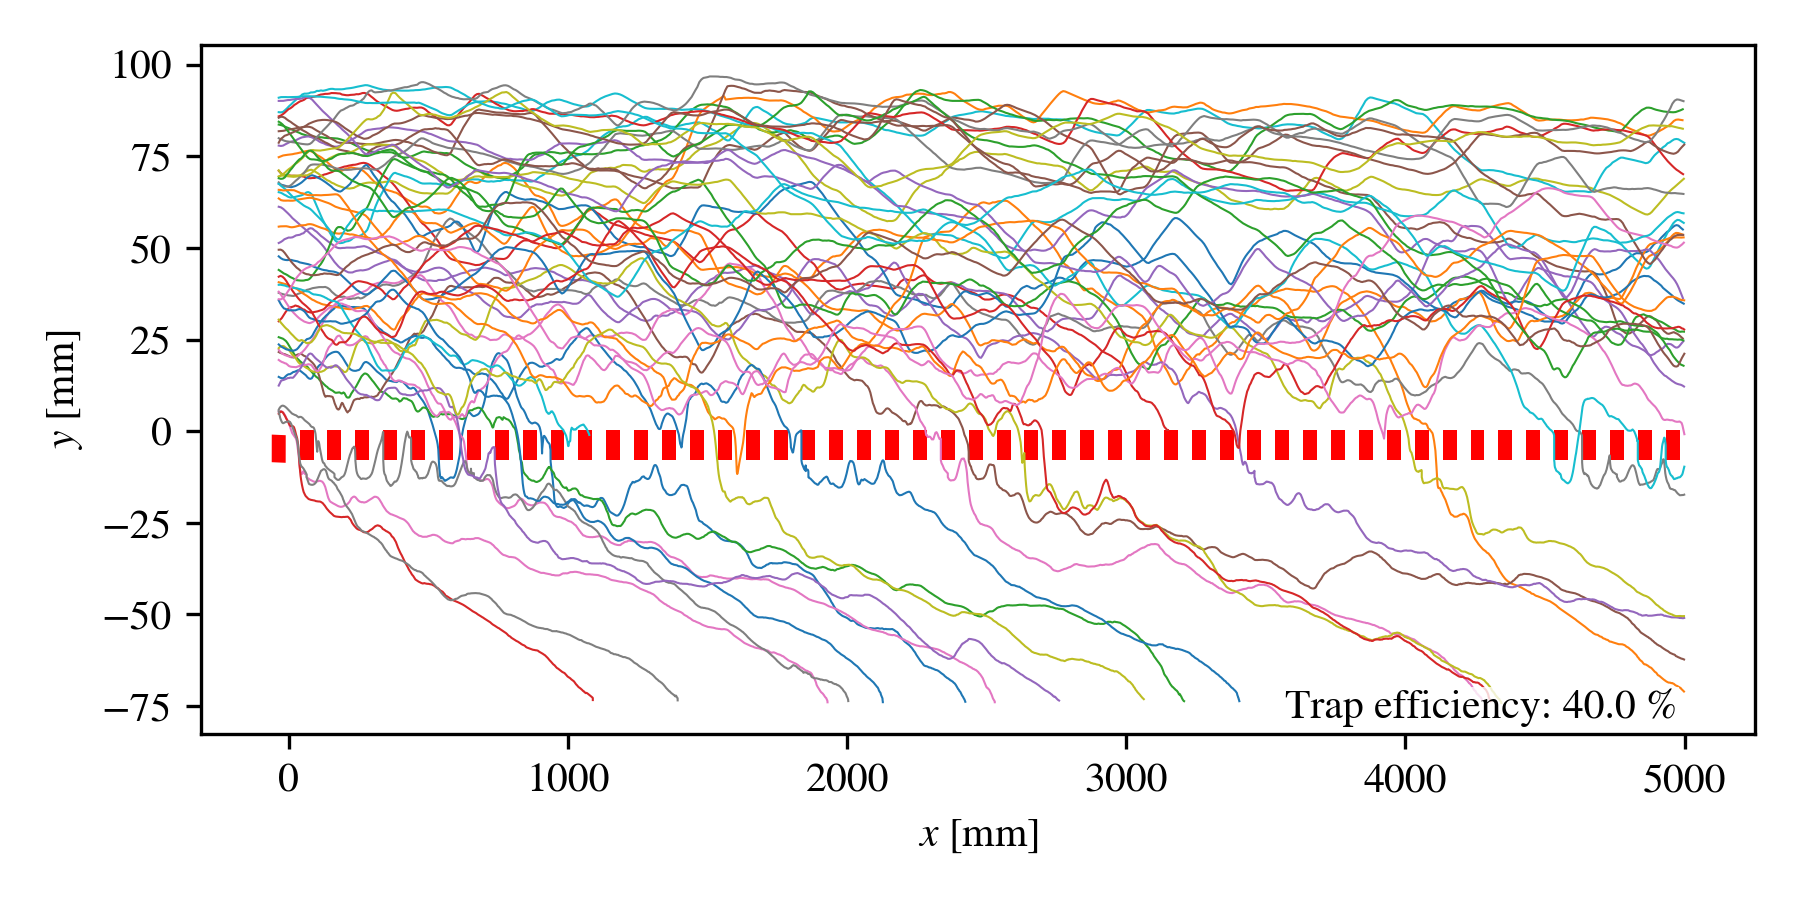

In [19]:
plt.close('all') 
#partikkelfil= Path("./partikkelsimulasjonar/particles_rib50_Q40_1_BDF_200_[0.05, 0.06]_1e-01_linear.pickle")
for partikkelfil in sorted(Path("./runs/rib50_Q40_1/").rglob("*_50_[0.05*")):
   # if not partikkelfil.name == "RK45_RK45_50_[0.05, 0.06]_1_1e-02_linear_test25.10.22.pickle":
    #    continue
    with open(partikkelfil, 'rb') as fil:
        partiklar = pickle.load(fil)
    skalering = 1
    myDPI = 300
    with h5py.File(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"),'r') as fil:
        h5py_ribs = np.asarray(fil['ribs'])
    del fil

    ribs = []
    for r in h5py_ribs:
        ribs.append(Rib(r))
    
    x = (ribs[0].get_rib_middle()[0],ribs[1].get_rib_middle()[0])
    x_width = x[1] - x[0]

    fig, ax  = plt.subplots(figsize=(1800/myDPI,900/myDPI),dpi=myDPI)
    ax.add_patch(Polygon(ribs[0].vertices, facecolor='red'))
    for i in range(int(5000/x_width)):
        ax.add_patch(Polygon(ribs[1].vertices+ i* np.asarray([x_width, 0]), facecolor='red'))
        
    fanga = 0
    ufanga = 0

    for p in partiklar:
        sti = p.sti_dict
        init = int(sti['init_time'])
        final = int(sti['final_time'])
        plott_array = np.zeros((final+1-init,4))
        for frame in range(init,final+1):
            plott_array[frame-init,:] = np.asarray(sti[frame]['position'])+np.asarray([sti[frame]['loops']*x_width,0,0,0])
        # if not np.any(plott_array[:,1]<0):
        #     continue
        if sti[final]['caught']:
            fanga += 1
        else:
            ufanga += 1
        ax.plot(plott_array[:,0], plott_array[:,1], linewidth=0.5, label=p.index)
    # ax.set_title(f"{partikkelfil.parent.name} {partikkelfil.stem} p_{p.index}")
    ax.set_xlabel(r'$x$ [mm]')
    ax.set_ylabel(r'$y$ [mm]')
    ax.text(0.95, 0.01, f"Trap efficiency: {100*fanga/(ufanga+fanga):.1f} %",
        verticalalignment='bottom', horizontalalignment='right',bbox={'facecolor': 'white','edgecolor':'None', 'alpha': 0.8, 'pad': 0.5},
        transform=ax.transAxes)
    # ax.legend(ncol=5, loc=2, bbox_to_anchor=(0, -0.15))
    # if p.index > 0:
    plt.tight_layout()

In [17]:
# sti[final]
ufanga

30

In [4]:
for partikkelfil in sorted(Path("./runs/").rglob("*_50_*")):
    print(Path("data").joinpath(partikkelfil.parents[0].name+"_ribs").with_suffix(".hdf5"))

data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib25_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib50_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5
data/rib75_Q40_1_ribs.hdf5


In [5]:
fil = h5py.File("./data/rib75_Q40_1.hdf5")
np.asarray(fil['ribs'])

array([[-80.77600276,  89.29260305],
       [-80.77600276,  -9.13120031],
       [-48.37780165,  -9.13120031],
       [-48.37780165, -17.03320058],
       [-61.81120211, -20.89640071],
       [-80.51260275, -20.89640071],
       [-80.51260275, -82.26860281],
       [ 88.50240302, -82.26860281],
       [ 88.50240302, -20.80860071],
       [ 32.04700109, -19.40380066],
       [ 24.93520085, -15.45280053],
       [ 24.93520085,  -8.34100028],
       [ 74.10320253,  -8.6922003 ],
       [ 88.41460302,  -9.21900032],
       [ 88.41460302,  89.29260305]])

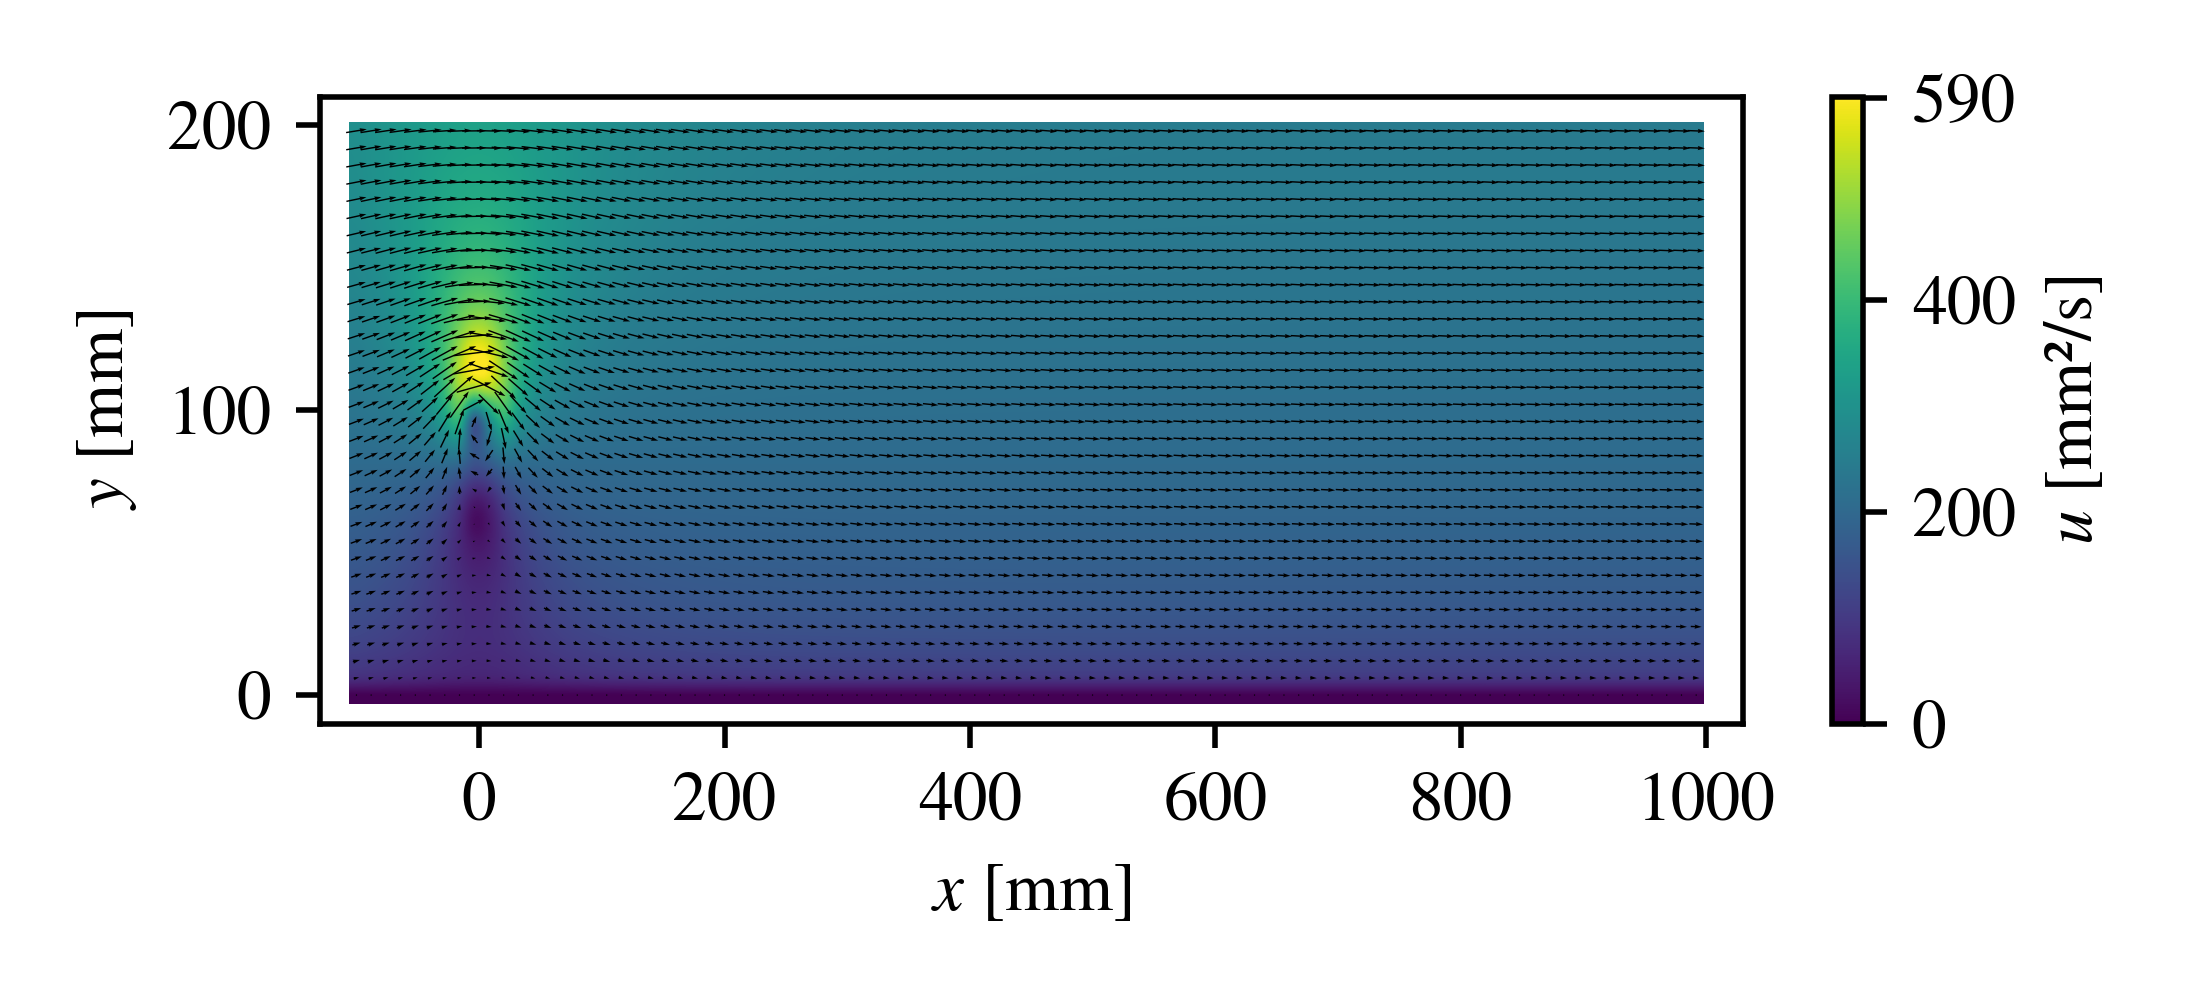

In [6]:
from math import log
from constants import g, ρ_p, ρ,ν
from hjelpefunksjonar import norm

π = np.pi
c1 = 2 * 50 * π * 200 # sirkulasjon, dvs. ved radius 50 mm skal farten vera 200 mm/s.
J = 0.0001
h = 300.
γ = g * ρ
τ0 = γ * h * J
u_star = (τ0/ρ)**0.5
k_s = 20.
hev = 100.
t= 50

def get_u_log(x):
    # with np.errstate(divide='raise'):
    u_log = np.zeros_like(x)
    u_log[0] = np.clip((2.5*np.log(np.clip(x[1]/k_s,a_min=0.00001,a_max=None)) + 8.5) * u_star,a_min=0.0,a_max=None)
    return u_log

u_log_max = get_u_log(np.asarray([[0], [h]]))[0]

def get_u(t, x_inn):
    #x_inn = x,y,u,v

    t= 50
    number_of_vectors = x_inn.shape[-1] #Dette er talet på vektorar pga vectorized i solve_ivp. Vanlegvis 1, men kan vera fleire, t.d. 4.

    kvervel = kvervelfunksjon(x_inn, c1,t)
    u_log = get_u_log(x_inn[:2])
    U_f =  kvervel * u_log[0]/u_log_max + u_log
   
    return U_f

def kvervelfunksjon(x_inn, c1, t):
    x_kvervel = x_inn[:2] - np.array([[0],[hev]])
    r =np.square(x_kvervel).sum(axis=-2)
    # kvervel = -np.expm1(-r/(4*ν))*c1*np.flip(x_kvervel, axis=-2)*np.array([[1],[-1]])/(r*4*np.pi)
    kvervel = np.divide(-np.expm1(-r/(4*ν*t))*c1*np.flip(x_kvervel, axis=-2)*np.array([[1],[-1]]) ,(r*2*np.pi), out=np.zeros_like(x_kvervel), where=r!=0)
    return kvervel
ty = 6
tx = 2*ty
x, y = np.meshgrid(np.arange(-100,1000,tx), np.arange(0,200,ty))

xy = np.stack((x.ravel(),y.ravel()))
#u = c1*(y-hev)/((2*π)*(x**2+(y-hev)**2)) * (1 - np.exp( -(x**2+(y-hev)**2)/(4* ν *t))) * (2.5*np.log(y/k_s) + 8.5) * u_star/u_log_max + (2.5*np.log(y/k_s) + 8.5) * u_star
#v = c1/(2*π) *(- x) /(x**2+(y-hev)**2) * (1 - np.exp( -(x**2+(y-hev)**2)/(4* ν *t)))

u = get_u(t, xy)
m = np.hypot(u[0],u[1]).reshape(x.shape)
myDPI = 500
fig, ax = plt.subplots(figsize=(2200/myDPI,1000/myDPI),dpi=myDPI)
im = ax.imshow(m, origin='lower', extent=(x[0,0]-tx/2,x[0,-1]+tx/2,y[0,0]-ty/2,y[-1,0]+ty/2), interpolation='spline16',aspect='auto', cmap='viridis')
Q = ax.quiver(x, y, u[0], u[1], pivot='mid', width=0.001,scale=20000)#, color='lightgrey')
ax.set_ylim((-10,210))
ax.set_xlim((-130,1030))
clb = fig.colorbar(im, ax=ax, ticks=[0,200,400,590])
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r'$y$ [mm]')
clb.ax.set_ylabel(r'$u$ [mm²/s]')
# ax.set_aspect('equal','box')
fig.tight_layout()


In [7]:
np.max(m)

591.5878142406109